# Importing the Packages

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
import seaborn as sns

In [5]:
import plotly.offline as py
import plotly.graph_objs as go
import datetime as dt

py.init_notebook_mode(connected=True)

# Loading the Data

In [6]:
cd2 = pd.read_csv('./archive.csv')

In [7]:
cd2.head(15)

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06
5,1958,6,1958.4548,NaN,NaN,317.22,315.14
6,1958,7,1958.5370,315.86,315.17,315.87,315.21
7,1958,8,1958.6219,314.93,316.17,314.01,315.29
8,1958,9,1958.7068,313.21,316.06,312.48,315.35
9,1958,10,1958.7890,NaN,NaN,312.45,315.40


In [8]:
cd2.shape

(720, 7)

In [9]:
cd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
Year                                 720 non-null int64
Month                                720 non-null int64
Decimal Date                         720 non-null float64
Carbon Dioxide (ppm)                 703 non-null float64
Seasonally Adjusted CO2 (ppm)        703 non-null float64
Carbon Dioxide Fit (ppm)             707 non-null float64
Seasonally Adjusted CO2 Fit (ppm)    707 non-null float64
dtypes: float64(5), int64(2)
memory usage: 39.5 KB


In [10]:
cd2.tail(15)

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
705,2016,10,2016.7896,401.50,405.12,401.48,405.09
706,2016,11,2016.8743,403.64,405.92,403.08,405.34
707,2016,12,2016.9563,404.55,405.49,404.66,405.58
708,2017,1,2017.0411,406.07,406.04,405.87,405.83
709,2017,2,2017.1260,406.64,405.90,NaN,NaN
710,2017,3,2017.2027,NaN,NaN,NaN,NaN
711,2017,4,2017.2877,NaN,NaN,NaN,NaN
712,2017,5,2017.3699,NaN,NaN,NaN,NaN
713,2017,6,2017.4548,NaN,NaN,NaN,NaN
714,2017,7,2017.5370,NaN,NaN,NaN,NaN


# Looking for NaN Values

In [11]:
print(cd2.isnull().any())

Year                                 False
Month                                False
Decimal Date                         False
Carbon Dioxide (ppm)                  True
Seasonally Adjusted CO2 (ppm)         True
Carbon Dioxide Fit (ppm)              True
Seasonally Adjusted CO2 Fit (ppm)     True
dtype: bool


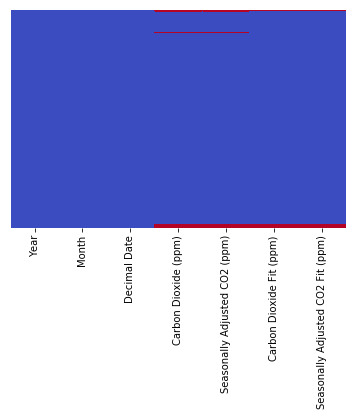

In [12]:
sns.heatmap(cd2.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

# Replacing the Null Values

In [ ]:
cd2.fillna(method='bfill')

In [ ]:
cd2.fillna(method='ffill')

# Ignore Data with NaN Values

In [13]:
old = cd2.shape
co2data = cd2.dropna()

print("\nIgnored records: ", old[0]-co2data.shape[0])


Ignored records:  18


# Variations with the CO2 concentration from 1958-2017 (~60 years)

In [30]:
group1 = cd2.groupby(["Year"]).mean()["Carbon Dioxide (ppm)"]
trace1 = go.Bar(x=group1.index, y=group1.values)
layout = go.Layout(
    title="Average CO<sub>2</sub> Levels in Atmosphere per Month",
    yaxis=dict(title="Parts per Million (PPM)", range=(300,420)),
    xaxis=dict(title="Year"))
fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig, filename = "co2-ppm-year")

# Fluctuations of the CO2 Levels

In [31]:
group2 = cd2.groupby(["Year", "Month"]).mean()["Carbon Dioxide (ppm)"]
x = [dt.datetime(year=i[0], month=i[1], day=15) for i in group2.index]

# Mean
y1 = group2.values

# Rolling Window Average
y2 = group2.rolling(3, min_periods=1).mean().values

# Exponentially Weighted Moving Average
y3 = group2.ewm(span=3, min_periods=1).mean().values

In [32]:
trace2 = go.Scatter(x=x, y=y1, mode="markers", name="Actual Value")
trace3 = go.Scatter(x=x, y=y2, line=dict(color="red"), name="Rolling Average")
trace4 = go.Scatter(x=x, y=y3, line=dict(color="blue"), name="EWM Average")

default_period = (dt.datetime(2008, 1, 1), dt.datetime(2017,12,1))
default_ppm_range = (380, 410)
layout = go.Layout(
    title="Seasonal Fluctations of CO<sub>2</sub> levels in atmosphere",
    yaxis=dict(title="Parts per Million (PPM)",range=default_ppm_range),
    xaxis=dict(title="Year", range=default_period))

fig = go.Figure(data=[trace2, trace3, trace4], layout=layout)
py.iplot(fig, )

OSError: [Errno 22] Invalid argument

# Predicting CO2 Concentration

In [ ]:
# Fit a linear model
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

x_learn = [ (i.year, i.month, i.month ** 2, i.year ** 2) for i in x]
y_learn = [ i for i in y1 ]  # Using rolling avg

x_train, x_test, y_train, y_test = train_test_split(x_learn, y_learn, test_size=0.40, random_state=45)
clf = linear_model.LinearRegression().fit(x_train, y_train)
print ("Accuracy: ", clf.score(x_test, y_test))

# predicted values
y4 = clf.predict(x_learn)

In [ ]:
# Select some future "years"
pred_years = range(1950, 2055)
pred_months = range(1, 13)

# Prepare dataset
x_pred = []
for y in pred_years:
    for m in pred_months:
        x_pred.append([y, m, m ** 2, y ** 2])
        
# Predict values
y_pred = clf.predict(x_pred)

# plot the predicted values
x_plt = [dt.datetime(i[0], i[1], 15) for i in x_pred]
trace5 = go.Scatter(x=x_plt, y=y_pred, line=dict(color="red"), name="Predicted value")

default_period = dt.datetime(1956, 1, 1), dt.datetime(2050,12,1)
default_ppm_range = (300, 500)
layout = go.Layout(
    title="Predicted Vs. Actual CO<sub>2</sub> Concentration levels",
    yaxis=dict(title="Parts per million (PPM)", range=default_ppm_range),
    xaxis=dict(title="Year", range=default_period))
figure = go.Figure(data=[trace2, trace5], layout=layout)
py.iplot(figure, filename="co2-ppm-prediction")